In [1]:
#Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path
import seaborn as sns
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

no display found. Using non-interactive Agg backend


In [2]:
#Directory
working_directory = os.getcwd()
print(working_directory)

/Users/pouyasohrab


In [3]:
#Directory
#path = working_directory + '/dmba/'
#df = pd.read_csv(path)

In [4]:
# 5.1

# Positive = Fraud 
# Negative = Non-Fraudulent
tp = 30 
fp = 58
tn = 920 
fn = 32
total = (tn+fp+fn+tp)

# Confusion Matrix
cmatrix = np.array([[tn,fp],[fn,tp]]) 
print("Confusion Matrix")
print(cmatrix)
# Error Rate and Print
error = (fp+fn)/total
print("Error %: ", round(error*100,2))


Confusion Matrix
[[920  58]
 [ 32  30]]
Error %:  8.65


# 5.4

A.
The first bar from the left in Figure 5.12 represents the lift value at the 10th percentile. Lift is a metric that measures effectiveness of a model in comparison to the baseline. For this instance, the lift value of roughly 7 at the 10th percentile indicates that the model is capable of identifying fraudulent cases at a rate 7 times higher than the baseline.

The second bar from the left represents the lift value at the 20th percentile, which is roughly at 2.5. This means that the model is capable of identifying fraudulent cases at a rate 2.5 times higher than the baseline at the 20th percentile.

In summary, The lift shows how much better the model can perform in comparison to a random selection of Fraud vs Non-Fraudulent.

B.
By analyzing the lift values and decile lift chart, you can identify which segments of the data the model performs better on. With this information you can allocate resources more effectively. For example, if the lift is higher at certain percentiles, and you have a tight budget for marketing campaign, you can focus more attention on the higher performing segments such as the top 10 and 20 percentiles (in this case) to detect and prevent fraudulent cases.

C.
True positives (TP): 30
False positives (FP): 58
True negatives (TN): 920
False negatives (FN): 32

To determine the actual negative and positive values, we need to consider the actual classification of the cases.

Actual positive cases (fraudulent): TP + FN = 30 + 32 = 62
Actual negative cases (non-fraudulent): FP + TN = 58 + 920 = 978
Total Cases 978+62 = 1040
False Negative 1040 - 978 = 62
Error rate will be equal to the False Negative Rate. FN/Total

Error Rate: (62/1040)*100 = 5.96%
    
D.
The error rate is a metric that provides a general measure of the model's accuracy by calculating the proportion of misclassified records. It gives an overall overview of the model's performance, but it does not provide insights on how the model performs across different segments.

The lift chart provides insight on the model's performance at different percentiles. It helps identify segments of data where the model performs better than the baseline. Lift metric is useful in identifying the higher performing segments (percentiles) so that we can focus on them and allocate resources if needed.

Overall, both metrics have their importance depending on the specific goals. The error rate illustrates the model's accuracy; while, the lift chart illustrates performance across different segments.


In [5]:
# 5.5
# A

# Positive = Fraud 
# Negative = Non-Fraudulent
tp = 310 
fp = 130 
tn = 270 
fn = 90 
total = (tn+fp+fn+tp)

# Confusion Matrix
cmatrix = np.array([[tn,fp],[fn,tp]])
print("Confusion Matrix")
print(cmatrix) 
# Error Rate and Print
error = (fp+fn)/total
print("Error %: ", round(error*100,2))

Confusion Matrix
[[270 130]
 [ 90 310]]
Error %:  27.5


In [6]:
# 5.5
# B

# Adjusting Weight
Weight_Responders = 50/1
Weight_Non_Responders = 50/99

# Adjusting
tp = 310/Weight_Responders 
fp = 130/Weight_Non_Responders 
tn = 270/Weight_Non_Responders 
fn = 90/Weight_Responders 
total = (tn+fp+fn+tp)

cmatrix = np.array([[tn,fp],[fn,tp]]) 
print("Confusion Matrix")
print(cmatrix) 
error = (fp+fn)/total 
print("Error %: ", round(error*100,2))

Confusion Matrix
[[534.6 257.4]
 [  1.8   6.2]]
Error %:  32.4


In [7]:
# 5.5
# C

# Fraud Classified As Fraud (Adjusted)
tp_adjusted = 310/Weight_Responders
print("Error %: ", (tp_adjusted/800)*100)

Error %:  0.775


In [10]:
# 5.7
# A

# Create Table
df = {
    'Propensity of 1': [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21, 0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
    'Actual': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
table = pd.DataFrame(df)
# Define Cutoffs
cutoffs = [0.25, 0.5, 0.75]

# Calculations
for x in cutoffs:
    predicted = table['Propensity of 1'] > x
    cmatrix = confusion_matrix(table['Actual'], predicted)
    tn = cmatrix[0, 0]
    fp = cmatrix[0, 1]
    fn = cmatrix[1, 0]
    tp = cmatrix[1, 1]
    total = (tn + fp + fn + tp)
    error = (fp + fn) / total
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
# Print Outputs  
    print("Cutoff:", x)
    print("Confusion Matrix:")
    print(cmatrix)
    print("Error %:", error)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print()

Cutoff: 0.25
Confusion Matrix:
[[9 8]
 [0 3]]
Error %: 0.4
Sensitivity: 1.0
Specificity: 0.5294117647058824

Cutoff: 0.5
Confusion Matrix:
[[15  2]
 [ 0  3]]
Error %: 0.1
Sensitivity: 1.0
Specificity: 0.8823529411764706

Cutoff: 0.75
Confusion Matrix:
[[17  0]
 [ 1  2]]
Error %: 0.05
Sensitivity: 0.6666666666666666
Specificity: 1.0



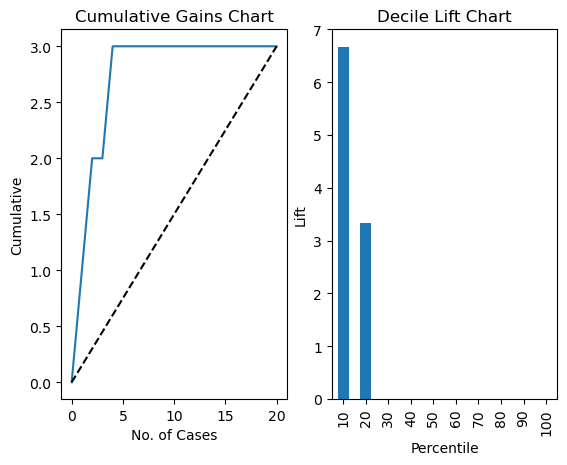

In [13]:
# 5.7
# B

# Import
%matplotlib inline
from dmba import gainsChart, liftChart

# Create Table
df = {
    'Propensity of 1': [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21, 0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
    'Actual': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
table = pd.DataFrame(df)

# Sort table on 'Propensity of 1' descending order
table = table.sort_values('Propensity of 1', ascending=False)

# Gains Chart
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(table['Actual'], ax=axes[0])
ax.set_xlabel('No. of Cases')
ax.set_ylabel('Cumulative')
ax.set_title('Cumulative Gains Chart')
# Lift Chart
ax = liftChart(table['Actual'], ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.show()